<a href="https://colab.research.google.com/github/Naoki0424/my_document/blob/main/20211021_TensorFlow_by_Low_levelAPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Low-level APIを触ってみる

## TensorFlowのVerを下げる
Low-level APIを動かすためにはTensorFlowのVerを下げる必要があります

In [41]:
%tensorflow_version 1.x

## ライブラリをインポート

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## 事前データを作成

In [43]:
# 目的変数
train_t = np.array([5.2, 5.7, 6.7, 8.9, 13.2, 15.3, 20.5, 29.2, 20.0, 19.2, 10.2, 9])
train_t = train_t.reshape([12, 1])
# 説明変数
train_x = np.array([[mon**n for n in range(0, 5)] for mon in range(1, 13)])

In [44]:
train_t

array([[ 5.2],
       [ 5.7],
       [ 6.7],
       [ 8.9],
       [13.2],
       [15.3],
       [20.5],
       [29.2],
       [20. ],
       [19.2],
       [10.2],
       [ 9. ]])

In [45]:
train_x

array([[    1,     1,     1,     1,     1],
       [    1,     2,     4,     8,    16],
       [    1,     3,     9,    27,    81],
       [    1,     4,    16,    64,   256],
       [    1,     5,    25,   125,   625],
       [    1,     6,    36,   216,  1296],
       [    1,     7,    49,   343,  2401],
       [    1,     8,    64,   512,  4096],
       [    1,     9,    81,   729,  6561],
       [    1,    10,   100,  1000, 10000],
       [    1,    11,   121,  1331, 14641],
       [    1,    12,   144,  1728, 20736]])

## 予測値を計算する式を定義する
例えば式を y = Xwとする時に、これをTensorFlow(Low-level API)のコードとして実装する場合は準備が必要です。

入力データをTensorFlowに受け渡す際はTensorFlow側でデータを受け取るための箱を用意する必要があります。

これは`Placeholder`と呼ばれています。

In [46]:
x = tf.placeholder(tf.float32, [None, 5])

placeholderの一つ目の引数はデータ方の指定をしています。基本的にデータ方を設定するのはLow-level APIのみです。

２つ目は受け取るデータの形状を指定します。今回の場合はtrain_xを受け取るため形状は[12, 5]となるはずですが、12ではなくNoneが指定されています。これは任意の個数を受け取れるようにするためです。

機械学習の学習処理においては一度に幾つかのデータをまとめて受け渡しますが、具体的な数字は場合によって異なります。そのためPlaceholderを定義する際は最初の次元をNoneにすることで任意の個数を受け取れるようにしています

パラメータ調整の対象となる係数（上の式で言うw）にはVariableというオブジェクトを定義します。

Variableは学習により最適化が行われる係数です

In [47]:
w = tf.Variable(tf.zeros([5, 1]))

`tf.zeros[5, 1]`は初期値を表しています

$$
w =\begin{pmatrix}
    w_{0} \\
    \vdots \\
    w_{4}
\end{pmatrix}
=
\begin{pmatrix}
    0 \\
    \vdots \\
    0
\end{pmatrix} \quad
$$

これにより式の定義を行うことができます。TensorFlowでは行列の積を`matmul`で計算します。

In [48]:
y = tf.matmul(x, w)

予測値を計算する式の定義を行うことができました。

## パラメータの最適化で使用する誤差関数の定義を行う

定義する誤差関数

$$
E = \frac{1}{2}\sum_{n=1}^{12}(y_{n} - t_{n})^2
$$

上の式の変数は以下を表しています

$$y_{n} = 予測値$$
$$t_{n} = 正解ラベル$$

正解ラベルにはtrain_tが代入されますが、train_xの時と同じくPlaceholderを定義する必要があります。

In [49]:
t = tf.placeholder(tf.float32, [None, 1])

これらを組み合わせることで誤差関数は以下のように定義できます

In [50]:
loss = tf.reduce_sum(tf.square(y - t))

(y-t)はベクトルの引き算。square()はベクトルの各成分を2乗する組み込み関数です。
reduce_sum()はベクトルの各成分を全て足し合わせるという組み込み関数です。先頭の1/2は誤差関数を最小化するwを求める上では不要なので省いています。

## 学習処理

最適化に使用するアルゴリズムを指定する

In [51]:
train_step = tf.train.AdamOptimizer().minimize(loss)

ここではAdamと呼ばれるアルゴリズムを用いて先ほどの誤差関数を最小化するパラメータwを求めます。

In [52]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

↑はLow-level APIの特徴的な仕組みです。
これまでにPlaceholderとVariableを定義してきましたが、実際の計算は行われていません。

ここからの計算処理は全てSession上で行われます。

In [53]:
i = 0
for _ in range(100000):
  i += 1
  sess.run(train_step, feed_dict={x:train_x, t:train_t})
  if i % 10000 == 0:
    loss_val = sess.run(loss, feed_dict={x:train_x, t:train_t})
    print('Step:{}, Loss:{}'.format(i, loss_val))

Step:10000, Loss:102.6875
Step:20000, Loss:100.81358337402344
Step:30000, Loss:99.13748168945312
Step:40000, Loss:97.58169555664062
Step:50000, Loss:96.14149475097656
Step:60000, Loss:94.80781555175781
Step:70000, Loss:93.56234741210938
Step:80000, Loss:98.77693176269531
Step:90000, Loss:91.34980010986328
Step:100000, Loss:111.76800537109375


`sess.run(train_step, feed_dict={x:train_x, t:train_t})`でパラメータ()wの調整を行っています。

`sess.run(loss, feed_dict={x:train_x, t:train_t})`で損失関数の値を取得しています。

`sess.run(train_step, feed_dict={x:train_x, t:train_t})`では`feed_dict`の設定により受け取ったPlaceholderを用いて誤差関数を最小にするパラメータ(w)の勾配を求め且つ、パラメータ(w)の更新まで行っています。



## 評価

In [54]:
sess.run(w)

array([[ 6.2141857e+00],
       [-3.1461933e+00],
       [ 1.4712111e+00],
       [-1.1026348e-01],
       [ 9.6194749e-04]], dtype=float32)

現時点のパラメータを確認することができます。この値を用いて平均気温を予測する多項式を関数として定義すると以下になります。

In [61]:
ws = sess.run(w)
def predict(x):
  pred = sum(ws[n][0] * x**n for n in range(0, 5))
  return pred

これは次の多項式と同じ意味です

$$
y = w_{0} + w_{1}x + w_{2}x^2 + w_{3}x^3 + w_{4}x^4
$$

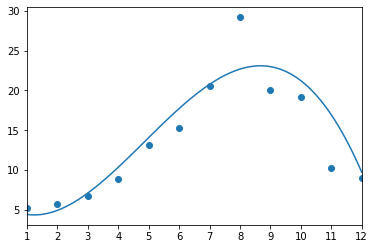

In [63]:
fig = plt.figure()
subplot = fig.add_subplot(1, 1, 1)
subplot.set_xlim(1, 12)
subplot.set_xticks(range(1, 13))
subplot.scatter(range(1, 13), train_t)
xs = np.linspace(1, 12, 100)
ys = predict(xs)
subplot.plot(xs, ys)

正解ラベルと比較し滑らかな一般化した曲線が得られていることが確認できる。